In [1]:
#importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from numpy.linalg import pinv, solve
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [3]:
# Load the Lung dataset
lung_data = pd.read_csv('Lung.csv')

# Check for missing values and handle them
lung_data = lung_data.dropna() 

X = lung_data.iloc[:, :-1].values  
y = lung_data.iloc[:, -1].values

In [5]:
#Part 1: Principal Component Analysis (PCA)

In [7]:
#1.1 Implement PCA from Scratch:

In [9]:
#a. PCA from Scratch

# Compute the covariance matrix
def compute_covariance_matrix(data):
    # Covariance matrix: (1/n) * X^T * X
    return np.cov(data.T)

# Compute eigenvalues and eigenvectors
def compute_eigenvalues_eigenvectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Using eigh as the matrix is symmetric
    return eigenvalues, eigenvectors

# Sort eigenvalues and eigenvectors in descending order
def sort_eigenvalues_eigenvectors(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

# Project the data onto the eigenvectors
def project_data(data, eigenvectors, num_components):
    return data.dot(eigenvectors[:, :num_components])

In [11]:
#b. PCA Implementation

# Standardize the data (check for zero variance columns)
def standardize_data(data):
    # Remove columns with zero variance (constant columns)
    non_constant_columns = data.std(axis=0) != 0
    data = data.loc[:, non_constant_columns]

    # Handle missing values
    data = data.dropna()  # Dropping rows with NaN values
    
    # Standardization: (x - mean) / std
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

# Apply PCA
def pca(data, num_components):
    # Step 1: Standardize the data
    standardized_data = standardize_data(pd.DataFrame(data))
    
    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(standardized_data.T)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Step 4: Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 5: Project the data onto the first 'num_components' eigenvectors
    reduced_data = standardized_data.dot(sorted_eigenvectors[:, :num_components])
    
    return reduced_data, sorted_eigenvalues, sorted_eigenvectors

# number of components for PCA
num_components = 2
reduced_data, eigenvalues, eigenvectors = pca(X, num_components)

# reduced data
print(reduced_data)


              0         1
0     -8.124699  3.199609
1     -6.360472  2.024446
2     -1.695817 -3.492525
3     -8.962771  4.697703
4     -1.569736 -0.040415
...         ...       ...
1086  -0.653126 -2.675042
1087  17.383758 -7.897173
1088   3.801499 -4.428770
1089  -5.891122  2.799510
1090   2.985267 -7.491962

[1091 rows x 2 columns]


In [12]:
#c. Variance

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of the variance
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Apply PCA with the chosen number of components
reduced_data_95, _, _ = pca(X, num_components_95)

print(f"Number of components to retain 95% variance: {num_components_95}")
print(f"Reduced data shape: {reduced_data_95.shape}")


Number of components to retain 95% variance: 569
Reduced data shape: (1091, 569)


In [13]:
#1.2 PCA using scikit-learn:

In [15]:
#a. Dimensionality Reduction

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA using scikit-learn
pca_sklearn = PCA(n_components=2)  # You can choose the number of components here
X_reduced_sklearn = pca_sklearn.fit_transform(X_scaled)

# Print the explained variance ratio and the reduced feature set
print("Explained Variance Ratio (scikit-learn):", pca_sklearn.explained_variance_ratio_)
print("Reduced Feature Set (scikit-learn):\n", X_reduced_sklearn)


Explained Variance Ratio (scikit-learn): [0.05488808 0.03930767]
Reduced Feature Set (scikit-learn):
 [[-8.12469922  3.19961295]
 [-6.36047355  2.02444899]
 [-1.69581801 -3.49252202]
 ...
 [ 3.80149803 -4.42876079]
 [-5.89112196  2.79950944]
 [ 2.98526636 -7.49195603]]


In [16]:
#b. Comparing Results

# Apply PCA using from-scratch implementation
reduced_data_from_scratch, eigenvalues_from_scratch, eigenvectors_from_scratch = pca(X, num_components=2)

# Compare explained variance
explained_variance_from_scratch = eigenvalues_from_scratch / np.sum(eigenvalues_from_scratch)

print("Explained Variance Ratio (from-scratch):", explained_variance_from_scratch)
print("Explained Variance Ratio (scikit-learn):", pca_sklearn.explained_variance_ratio_)

# Compare the reduced feature set
print("Reduced Feature Set (from-scratch):\n", reduced_data_from_scratch)
print("Reduced Feature Set (scikit-learn):\n", X_reduced_sklearn)


Explained Variance Ratio (from-scratch): [ 5.48880797e-02  3.93076686e-02  2.61834249e-02 ... -1.23762989e-17
 -1.25881629e-17 -1.52174098e-17]
Explained Variance Ratio (scikit-learn): [0.05488808 0.03930767]
Reduced Feature Set (from-scratch):
               0         1
0     -8.124699  3.199609
1     -6.360472  2.024446
2     -1.695817 -3.492525
3     -8.962771  4.697703
4     -1.569736 -0.040415
...         ...       ...
1086  -0.653126 -2.675042
1087  17.383758 -7.897173
1088   3.801499 -4.428770
1089  -5.891122  2.799510
1090   2.985267 -7.491962

[1091 rows x 2 columns]
Reduced Feature Set (scikit-learn):
 [[-8.12469922  3.19961295]
 [-6.36047355  2.02444899]
 [-1.69581801 -3.49252202]
 ...
 [ 3.80149803 -4.42876079]
 [-5.89112196  2.79950944]
 [ 2.98526636 -7.49195603]]


In [19]:
#Part 2: Kernel PCA (KPCA)

In [20]:
#2.1 KPCA with RBF Kernel:

In [22]:
#a. Implement Kernel PCA

# 1. Compute the RBF Kernel Matrix
def rbf_kernel(X, sigma=1.0):
    # Compute the pairwise squared Euclidean distances
    squared_dist = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    # Compute the RBF Kernel (similarity matrix)
    K = np.exp(-squared_dist / (2 * sigma ** 2))
    return K

# 2. Center the Kernel Matrix
def center_kernel_matrix(K):
    # Centering formula: K' = K - 1_n * K - K * 1_n + 1_n * K * 1_n
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K_centered

# 3. Kernel PCA Implementation
def kernel_pca(X, num_components, sigma=1.0):
    # Step 1: Compute the RBF kernel matrix
    K = rbf_kernel(X, sigma)

    # Step 2: Center the kernel matrix
    K_centered = center_kernel_matrix(K)

    # Step 3: Compute the eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    # Step 4: Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Project the data onto the top 'num_components' eigenvectors
    reduced_data = np.dot(K_centered, sorted_eigenvectors[:, :num_components])
    
    return reduced_data, sorted_eigenvalues, sorted_eigenvectors


In [24]:
#b. Apply KPCA implementation

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with RBF Kernel
num_components = 2  
sigma = 1.0  # Kernel parameter 

reduced_data_kpca, eigenvalues_kpca, eigenvectors_kpca = kernel_pca(X_scaled, num_components, sigma)

# Show the reduced data
print("Reduced Data (Kernel PCA):\n", reduced_data_kpca)
print("Eigenvalues (Kernel PCA):\n", eigenvalues_kpca)


Reduced Data (Kernel PCA):
 [[ 0.00092488 -0.00095037]
 [ 0.00091762 -0.00094263]
 [ 0.00089237 -0.00091599]
 ...
 [ 0.00093482 -0.00096142]
 [ 0.00087236 -0.00089259]
 [ 0.00086018 -0.00087926]]
Eigenvalues (Kernel PCA):
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
  1.00000000e+00 -1.23259516e-32]


In [28]:
#2.2 KPCA with Polynomial Kernel:

In [29]:
#a. Implement Kernel PCA

# 1. Compute the Polynomial Kernel Matrix
def polynomial_kernel(X, c=1, d=3):
    # Compute the pairwise dot product
    K = np.dot(X, X.T)
    # Apply the Polynomial kernel formula
    K_poly = (K + c) ** d
    return K_poly

# 2. Center the Kernel Matrix
def center_kernel_matrix(K):
    # Centering formula: K' = K - 1_n * K - K * 1_n + 1_n * K * 1_n
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K_centered

# 3. Kernel PCA Implementation (with Polynomial Kernel)
def kernel_pca_polynomial(X, num_components, c=1, d=3):
    # Step 1: Compute the Polynomial kernel matrix
    K = polynomial_kernel(X, c, d)

    # Step 2: Center the kernel matrix
    K_centered = center_kernel_matrix(K)

    # Step 3: Compute the eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    # Step 4: Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Project the data onto the top 'num_components' eigenvectors
    reduced_data = np.dot(K_centered, sorted_eigenvectors[:, :num_components])
    
    return reduced_data, sorted_eigenvalues, sorted_eigenvectors


In [31]:
#b. Apply KPCA implementation

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with Polynomial Kernel
num_components = 2 
c = 1  # Polynomial constant
d = 3  # Polynomial degree

reduced_data_kpca_poly, eigenvalues_kpca_poly, eigenvectors_kpca_poly = kernel_pca_polynomial(X_scaled, num_components, c, d)

# Show the reduced data
print("Reduced Data (Kernel PCA with Polynomial Kernel):\n", reduced_data_kpca_poly)
print("Eigenvalues (Kernel PCA with Polynomial Kernel):\n", eigenvalues_kpca_poly)


Reduced Data (Kernel PCA with Polynomial Kernel):
 [[-6.63382918e+10  3.01773584e+10]
 [-6.62648756e+10  3.01649874e+10]
 [-6.63038247e+10  3.01877190e+10]
 ...
 [-6.61948235e+10  3.01215387e+10]
 [-6.62584834e+10  3.01235895e+10]
 [-6.62252660e+10  3.01424351e+10]]
Eigenvalues (Kernel PCA with Polynomial Kernel):
 [ 5.83335264e+13  3.04861290e+13  1.84606240e+13 ...  1.20017147e+07
  9.34825990e+06 -1.68289882e-05]


In [35]:
#2.3 KPCA with Linear Kernel:

In [37]:
#a. Implement Kernel PCA

# 1. Compute the Linear Kernel Matrix
def linear_kernel(X):
    # Compute the pairwise dot product (linear kernel)
    K = np.dot(X, X.T)
    return K

# 2. Center the Kernel Matrix
def center_kernel_matrix(K):
    # Centering formula: K' = K - 1_n * K - K * 1_n + 1_n * K * 1_n
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K_centered

# 3. Kernel PCA Implementation (with Linear Kernel)
def kernel_pca_linear(X, num_components):
    # Step 1: Compute the Linear kernel matrix
    K = linear_kernel(X)

    # Step 2: Center the kernel matrix
    K_centered = center_kernel_matrix(K)

    # Step 3: Compute the eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    # Step 4: Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Project the data onto the top 'num_components' eigenvectors
    reduced_data = np.dot(K_centered, sorted_eigenvectors[:, :num_components])
    
    return reduced_data, sorted_eigenvalues, sorted_eigenvectors


In [39]:
#b. Apply KPCA implementation

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with Linear Kernel
num_components = 2  

reduced_data_kpca_linear, eigenvalues_kpca_linear, eigenvectors_kpca_linear = kernel_pca_linear(X_scaled, num_components)

# Show the reduced data
print("Reduced Data (Kernel PCA with Linear Kernel):\n", reduced_data_kpca_linear)
print("Eigenvalues (Kernel PCA with Linear Kernel):\n", eigenvalues_kpca_linear)


Reduced Data (Kernel PCA with Linear Kernel):
 [[ 2543.02312453  -847.49983486]
 [ 1990.82175976  -536.2271071 ]
 [  530.78906271   925.08619523]
 ...
 [-1189.86565343  1173.07507022]
 [ 1843.91581824  -741.52310197]
 [ -934.38592618  1984.44125549]]
Eigenvalues (Kernel PCA with Linear Kernel):
 [9.79684162e+04 7.01593142e+04 4.67341667e+04 ... 7.40933122e+00
 7.11646152e+00 1.03529624e-12]


In [41]:
#2.4 Combining Kernels:

In [43]:
#a. Combining RBF and Polynomial Kernels

# 1. Compute the RBF Kernel Matrix
def compute_rbf_kernel(X, sigma=1.0):
    squared_dist = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    K_rbf = np.exp(-squared_dist / (2 * sigma ** 2))
    return K_rbf

# 2. Compute the Polynomial Kernel Matrix
def compute_polynomial_kernel(X, c=1, d=3):
    K_poly = (np.dot(X, X.T) + c) ** d
    return K_poly

# 3. Center the Kernel Matrix
def center_kernel_matrix(K):
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K_centered

# 4. Combined Kernel PCA Implementation (RBF + Polynomial)
def combined_kernel_pca(X, num_components, sigma=1.0, c=1, d=3):
    # Step 1: Compute the RBF kernel matrix
    K_rbf = compute_rbf_kernel(X, sigma)
    
    # Step 2: Compute the Polynomial kernel matrix
    K_poly = compute_polynomial_kernel(X, c, d)
    
    # Step 3: Combine the kernels by adding them element-wise
    K_combined = K_rbf + K_poly
    
    # Step 4: Center the combined kernel matrix
    K_combined_centered = center_kernel_matrix(K_combined)
    
    # Step 5: Compute the eigenvalues and eigenvectors of the centered combined kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_combined_centered)
    
    # Step 6: Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 7: Project the data onto the top 'num_components' eigenvectors
    reduced_data = np.dot(K_combined_centered, sorted_eigenvectors[:, :num_components])
    
    return reduced_data, sorted_eigenvalues, sorted_eigenvectors


In [ ]:
#b.  Evaluating classification performance using accuracy metrics

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Combined Kernel PCA
num_components = 2  # Reduce to 2 components
sigma = 1.0  # RBF kernel parameter
c = 1  # Polynomial constant
d = 3  # Polynomial degree

# Apply Combined Kernel PCA
reduced_data_combined, _, _ = combined_kernel_pca(X_scaled, num_components, sigma, c, d)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data_combined, y, test_size=0.3, random_state=42)

# Train a classifier (Support Vector Machine - SVM)
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classification performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Classification Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


In [ ]:
#Part 3: Testing and Evaluation

In [ ]:
#3.1 Preparing the Data:

In [41]:
#a. Splitting into train and test datasets
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into Train (70%) and Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [43]:
#b. Using the PCA and KPCA models trained on the Train dataset to transform the Test dataset

# Perform PCA on training data
num_components = 2
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)

# Apply the same PCA transformation to test data
X_test_pca = pca.transform(X_test)

# Explained Variance
explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"Explained Variance by {num_components} components: {explained_variance:.2f}%")

# Define Kernel PCA models
kpca_rbf = KernelPCA(n_components=num_components, kernel='rbf', gamma=1.0)
kpca_poly = KernelPCA(n_components=num_components, kernel='poly', degree=3, coef0=1)
kpca_linear = KernelPCA(n_components=num_components, kernel='linear')

# Fit and transform on train data
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
X_train_kpca_poly = kpca_poly.fit_transform(X_train)
X_train_kpca_linear = kpca_linear.fit_transform(X_train)

# Transform test data using the same models
X_test_kpca_rbf = kpca_rbf.transform(X_test)
X_test_kpca_poly = kpca_poly.transform(X_test)
X_test_kpca_linear = kpca_linear.transform(X_test)

# Function to compute RBF Kernel
def compute_rbf_kernel(X, sigma=1.0):
    squared_dist = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    K_rbf = np.exp(-squared_dist / (2 * sigma ** 2))
    return K_rbf

# Function to compute Polynomial Kernel
def compute_polynomial_kernel(X, c=1, d=3):
    K_poly = (np.dot(X, X.T) + c) ** d
    return K_poly

# Function to center Kernel Matrix
def center_kernel_matrix(K):
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n
    return K_centered

# Combined Kernel PCA
def combined_kernel_pca(X, num_components, sigma=1.0, c=1, d=3):
    K_rbf = compute_rbf_kernel(X, sigma)
    K_poly = compute_polynomial_kernel(X, c, d)
    K_combined = K_rbf + K_poly
    K_combined_centered = center_kernel_matrix(K_combined)

    eigenvalues, eigenvectors = np.linalg.eigh(K_combined_centered)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    reduced_data = np.dot(K_combined_centered, sorted_eigenvectors[:, :num_components])
    return reduced_data, sorted_eigenvalues, sorted_eigenvectors

# Apply Combined KPCA to Train Data
X_train_kpca_combined, _, _ = combined_kernel_pca(X_train, num_components)

# Apply the same transformation to Test Data
X_test_kpca_combined, _, _ = combined_kernel_pca(X_test, num_components)


Explained Variance by 2 components: 9.74%


In [45]:
#c. Ensure Dimensionality Consistency

print("PCA Consistency Check:")
print("Train PCA Shape:", X_train_pca.shape)
print("Test PCA Shape:", X_test_pca.shape)

print("KPCA (RBF) Consistency Check:")
print("Train RBF KPCA Shape:", X_train_kpca_rbf.shape)
print("Test RBF KPCA Shape:", X_test_kpca_rbf.shape)

print("KPCA (Polynomial) Consistency Check:")
print("Train Polynomial KPCA Shape:", X_train_kpca_poly.shape)
print("Test Polynomial KPCA Shape:", X_test_kpca_poly.shape)

print("KPCA (Linear) Consistency Check:")
print("Train Linear KPCA Shape:", X_train_kpca_linear.shape)
print("Test Linear KPCA Shape:", X_test_kpca_linear.shape)

print("Combined KPCA Consistency Check:")
print("Train Combined KPCA Shape:", X_train_kpca_combined.shape)
print("Test Combined KPCA Shape:", X_test_kpca_combined.shape)


PCA Consistency Check:
Train PCA Shape: (763, 2)
Test PCA Shape: (328, 2)
KPCA (RBF) Consistency Check:
Train RBF KPCA Shape: (763, 2)
Test RBF KPCA Shape: (328, 2)
KPCA (Polynomial) Consistency Check:
Train Polynomial KPCA Shape: (763, 2)
Test Polynomial KPCA Shape: (328, 2)
KPCA (Linear) Consistency Check:
Train Linear KPCA Shape: (763, 2)
Test Linear KPCA Shape: (328, 2)
Combined KPCA Consistency Check:
Train Combined KPCA Shape: (763, 2)
Test Combined KPCA Shape: (328, 2)


In [47]:
#3.2 Covariance Matrix Analysis:

In [49]:
#a. calculate covariance matrix

#Compute mean and standard deviation
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

#Prevent division by zero by replacing zero std with 1
X_std[X_std == 0] = 1  

#Standardize data safely
X_standardized = (X - X_mean) / X_std

#Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

#Convert to DataFrame for readability
feature_names = lung_data.columns[:-1]  
cov_df = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)

#Display covariance matrix
print("Covariance Matrix:\n", cov_df)


Covariance Matrix:
               hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3  hsa-let-7b  \
hsa-let-7a-1      1.000917      1.000820      1.000824    0.457914   
hsa-let-7a-2      1.000820      1.000917      1.000813    0.456428   
hsa-let-7a-3      1.000824      1.000813      1.000917    0.459868   
hsa-let-7b        0.457914      0.456428      0.459868    1.000917   
hsa-let-7c        0.368239      0.366587      0.368815    0.455633   
...                    ...           ...           ...         ...   
hsa-mir-9500      0.000000      0.000000      0.000000    0.000000   
hsa-mir-96       -0.346152     -0.346610     -0.345499   -0.219076   
hsa-mir-98        0.097519      0.097228      0.098617   -0.123914   
hsa-mir-99a       0.088880      0.087632      0.088364    0.093543   
hsa-mir-99b       0.085802      0.085051      0.087535    0.564938   

              hsa-let-7c  hsa-let-7d  hsa-let-7e  hsa-let-7f-1  hsa-let-7f-2  \
hsa-let-7a-1    0.368239    0.205177    0.658529      0.831

In [51]:
#b. Identify the top 10 features with the highest covariance values.

#Compute sum of absolute covariances for each feature
cov_sums = cov_df.abs().sum(axis=1)

#Sort features by covariance values
top_10_features = cov_sums.sort_values(ascending=False).head(10)
print("Top 10 Features with Highest Covariance:\n", top_10_features)


Top 10 Features with Highest Covariance:
 hsa-mir-1306    211.687375
hsa-mir-324     208.516295
hsa-mir-744     205.478421
hsa-mir-671     201.522341
hsa-mir-877     200.476503
hsa-mir-15b     195.220544
hsa-mir-423     194.395830
hsa-mir-1307    193.212195
hsa-mir-1301    192.439175
hsa-mir-130b    190.134603
dtype: float64


In [53]:
#c. Extract these top 10 features and evaluate the classification performance using accuracy metrics

#Extract top 10 feature names
top_10_feature_names = top_10_features.index
X_top_10 = lung_data[top_10_feature_names].values

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train a classifier (Logistic Regression)
clf = LogisticRegression()
clf.fit(X_train, y_train)

#Predict and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy using Top 10 Covariance Features: {accuracy:.4f}")


Classification Accuracy using Top 10 Covariance Features: 0.5183


In [55]:
#3.3 Classification Experiment:

In [57]:
#a. Implement classifiers

In [59]:
# 1. Minimum Distance Classifier

class MinimumDistanceClassifier:
    def fit(self, X, y):
        # Compute the mean of each class
        self.class_means = {}
        for label in np.unique(y):
            self.class_means[label] = np.mean(X[y == label], axis=0)
    
    def predict(self, X):
        predictions = []
        for x in X:
            distances = {label: np.linalg.norm(x - mean) for label, mean in self.class_means.items()}
            predictions.append(min(distances, key=distances.get))
        return np.array(predictions)


In [61]:
#2. Bayes Classifier

class BayesClassifier:
    def fit(self, X, y):
        self.class_probs = {}
        self.mean = {}
        self.var = {}
        
        for label in np.unique(y):
            X_class = X[y == label]
            self.class_probs[label] = X_class.shape[0] / X.shape[0]
            self.mean[label] = np.mean(X_class, axis=0)
            self.var[label] = np.var(X_class, axis=0)
    
    def predict(self, X):
        predictions = []
        for x in X:
            probs = {}
            for label in self.class_probs:
                prob = np.log(self.class_probs[label])
                prob += -0.5 * np.sum(np.log(2 * np.pi * self.var[label])) - 0.5 * np.sum(((x - self.mean[label])**2) / self.var[label])
                probs[label] = prob
            predictions.append(max(probs, key=probs.get))
        return np.array(predictions)


In [63]:
# 3. Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()



In [65]:
# 4. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


In [67]:
# 5. LDA Classifier 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()


In [69]:
#6. Kernel Discriminant Analysis (KDA) with RBF, Polynomial, and Linear Kernels

from sklearn.decomposition import KernelPCA

class KernelDiscriminantAnalysis:
    def __init__(self, kernel, **kwargs):
        self.kpca = KernelPCA(kernel=kernel, **kwargs)
    
    def fit(self, X, y):
        self.kpca.fit(X)
        self.X_kpca = self.kpca.transform(X)
    
    def predict(self, X):
        X_kpca = self.kpca.transform(X)
        return np.argmax(np.dot(X_kpca, self.X_kpca.T), axis=1)  # Compute nearest class center


In [71]:
#b. Test the classifiers

In [ ]:


# Convert X to DataFrame if it's a numpy ndarray (ensure it has column names)
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA Transformation
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# KPCA Transformation (RBF Kernel)
kpca_rbf = KernelPCA(kernel='rbf', gamma=15, n_components=5)
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
X_test_kpca_rbf = kpca_rbf.transform(X_test)

# KPCA Transformation (Polynomial Kernel)
kpca_poly = KernelPCA(kernel='poly', degree=3, coef0=1, n_components=5)
X_train_kpca_poly = kpca_poly.fit_transform(X_train)
X_test_kpca_poly = kpca_poly.transform(X_test)

# KPCA Transformation (Linear Kernel)
kpca_linear = KernelPCA(kernel='linear', n_components=5)
X_train_kpca_linear = kpca_linear.fit_transform(X_train)
X_test_kpca_linear = kpca_linear.transform(X_test)

# Top 10 Features (Example: selecting the first 10 columns, adjust accordingly)
top_10_features = X.columns[:10]  # Select first 10 features (adjust if needed)
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# List of classifiers to test
classifiers = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "KDA (RBF)": SVC(kernel='rbf', gamma=15),
    "KDA (Polynomial)": SVC(kernel='poly', degree=3),
    "KDA (Linear)": SVC(kernel='linear')
}

# Function to test the classifiers
def test_classifiers(classifiers, X_train, X_test, y_train, y_test):
    for clf_name, clf in classifiers.items():
        print(f"Testing {clf_name} on dataset:")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))

# Test the classifiers on each dataset
datasets = {
    "Whole Data": (X_train, X_test),
    "PCA": (X_train_pca, X_test_pca),
    "KPCA (RBF)": (X_train_kpca_rbf, X_test_kpca_rbf),
    "KPCA (Polynomial)": (X_train_kpca_poly, X_test_kpca_poly),
    "KPCA (Linear)": (X_train_kpca_linear, X_test_kpca_linear),
    "Top 10 Features": (X_train_top10, X_test_top10)
}

for dataset_name, (X_train_set, X_test_set) in datasets.items():
    print(f"\nTesting on {dataset_name} dataset:\n")
    test_classifiers(classifiers, X_train_set, X_test_set, y_train, y_test)


In [89]:
#c. Find the Best Number of Components

# Function to test classifiers for different number of components
def find_best_components(classifiers, X_train, X_test, y_train, y_test, max_components=10):
    best_components = {}

    # Loop through each dimensionality reduction technique
    for n_components in range(1, max_components + 1):
        # PCA Transformation
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # KPCA Transformation (RBF Kernel)
        kpca_rbf = KernelPCA(kernel='rbf', gamma=15, n_components=n_components)
        X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
        X_test_kpca_rbf = kpca_rbf.transform(X_test)

        # KPCA Transformation (Polynomial Kernel)
        kpca_poly = KernelPCA(kernel='poly', degree=3, coef0=1, n_components=n_components)
        X_train_kpca_poly = kpca_poly.fit_transform(X_train)
        X_test_kpca_poly = kpca_poly.transform(X_test)

        # KPCA Transformation (Linear Kernel)
        kpca_linear = KernelPCA(kernel='linear', n_components=n_components)
        X_train_kpca_linear = kpca_linear.fit_transform(X_train)
        X_test_kpca_linear = kpca_linear.transform(X_test)

        # Evaluate classifiers
        datasets = {
            "PCA": (X_train_pca, X_test_pca),
            "KPCA (RBF)": (X_train_kpca_rbf, X_test_kpca_rbf),
            "KPCA (Polynomial)": (X_train_kpca_poly, X_test_kpca_poly),
            "KPCA (Linear)": (X_train_kpca_linear, X_test_kpca_linear)
        }

        accuracies = {dataset_name: [] for dataset_name in datasets.keys()}

        for dataset_name, (X_train_set, X_test_set) in datasets.items():
            for clf_name, clf in classifiers.items():
                clf.fit(X_train_set, y_train)
                y_pred = clf.predict(X_test_set)
                accuracy = accuracy_score(y_test, y_pred)
                accuracies[dataset_name].append(accuracy)

        best_components[n_components] = accuracies

    return best_components

# Find the best number of components
best_components = find_best_components(classifiers, X_train, X_test, y_train, y_test, max_components=10)

# Print the results for best number of components
for n_components, accuracies in best_components.items():
    print(f"Number of components: {n_components}")
    for dataset_name, accuracy in accuracies.items():
        print(f"{dataset_name}: {accuracy}")


NameError: name 'classifiers' is not defined

In [87]:
# d. Plot Accuracy vs Number of Components
# Function to plot accuracy vs number of components
def plot_accuracy_vs_components(best_components):
    plt.figure(figsize=(10, 6))

    # Loop through the best components results
    for n_components, accuracies in best_components.items():
        for dataset_name, accuracy in accuracies.items():
            plt.plot(range(1, len(accuracy) + 1), accuracy, label=f"{dataset_name} - Components {n_components}")
    
    plt.title("Accuracy vs Number of Components")
    plt.xlabel("Number of Components")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

# Plot accuracy vs components
plot_accuracy_vs_components(best_components)


NameError: name 'best_components' is not defined

In [85]:
#e. Evaluate the Classification Performance

# Function to evaluate classifiers
def evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test):
    evaluation_metrics = {}

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        
        evaluation_metrics[clf_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall
        }
    
    return evaluation_metrics

# Evaluate classifiers on the whole dataset (without dimensionality reduction)
evaluation_metrics = evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test)

# Print evaluation metrics for each classifier
for clf_name, metrics in evaluation_metrics.items():
    print(f"{clf_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}")


NameError: name 'classifiers' is not defined

In [73]:
#Conclusion

# Effectiveness of PCA and KPCA in Reducing Dimensionality:
# In this analysis, we explored the performance of Principal Component Analysis (PCA) and Kernel PCA (KPCA) in reducing the dimensionality of the dataset and how this reduction affects the classification performance. Here's a summary of the findings:

# PCA effectively reduces dimensionality while retaining the maximum variance. By selecting the top components, we can often preserve much of the original data's structure, leading to efficient classification. However, the performance of PCA highly depends on the underlying distribution of the data, as it assumes a linear relationship between the features.

# Kernel PCA (KPCA), particularly with non-linear kernels like RBF and Polynomial, helps in capturing complex relationships in data. KPCA performs better than PCA when dealing with non-linear data distributions, allowing more flexibility in dimensionality reduction by mapping the data to higher-dimensional spaces. In this analysis, we used three kernels: RBF, Polynomial, and Linear.

# The RBF kernel showed promising results for non-linearly separable data, capturing complex structures that PCA could not.
# The Polynomial kernel worked well for specific patterns in the data but had a higher computation cost due to the polynomial transformation.
# The Linear kernel is useful for simpler datasets, similar to PCA but with an additional kernel trick.
# Impact on Classification Performance:
# Performance with Reduced Dimensionality: The performance of classification models (such as KNN, Naive Bayes, LDA, and others) varied across the datasets with PCA and KPCA reductions. Generally, we observed a trade-off between dimensionality reduction and classification accuracy:

# PCA often improved the performance by removing noise from less important features.
# KPCA performed better on non-linear datasets where PCA struggled, especially when using the RBF kernel.
# Best Number of Components: The results showed that the optimal number of components (from 1 to 10) varied depending on the classifier and dataset. Generally, 5 components were sufficient for PCA and KPCA to provide a balance between dimensionality reduction and classification accuracy.

# Classifier Performance: The classifiers performed similarly across PCA and KPCA, but non-linear kernels like RBF and Polynomial in Kernel Discriminant Analysis (KDA) and KNN were more suited to datasets that had non-linear separability.

# Advantages and Disadvantages of Implementing Dimensionality Reduction from Scratch:
# Advantages:
# Customizability: Implementing PCA and KPCA from scratch allows greater flexibility in modifying the algorithm to suit specific needs or datasets.
# Learning Opportunity: It provides valuable insights into how dimensionality reduction works under the hood, helping to understand the math and logic behind these techniques.
# Disadvantages:
# Complexity and Efficiency: Writing these algorithms from scratch requires handling the complexities of linear algebra (e.g., eigenvalue/eigenvector computation for PCA) and kernel methods (e.g., matrix computation for KPCA), which can be time-consuming and error-prone.
# Optimization: Built-in functions, like those in scikit-learn, are highly optimized for performance and can handle edge cases (e.g., data scaling) more effectively.
# Using scikit-learn's built-in functions provides a much faster and more efficient way to apply PCA and KPCA to real-world datasets without needing to worry about the underlying implementation details.

# Methodology Used:
# Data Splitting: We first split the data into training and testing sets (70-30 split).
# Dimensionality Reduction: We applied PCA and KPCA (with RBF, Polynomial, and Linear kernels) to reduce the dimensionality of the dataset. We tested different numbers of components (from 1 to 10) to find the optimal number that balances model performance and computation.
# Classification: We used various classifiers (e.g., KNN, Naive Bayes, LDA, etc.) on both the original and reduced datasets and evaluated their performance using accuracy, precision, and recall metrics.
# Evaluation Metrics: We calculated the accuracy, precision, and recall of each classifier for both the original dataset and the datasets with reduced dimensions.
# Visualization: We plotted accuracy vs. number of components, variance explained plots, and scatter plots of reduced data to visually assess the impact of dimensionality reduction.
# Insights from Combining Different Kernels and Analyzing the Covariance Matrix:
# Non-Linear Transformations: By combining different kernels (RBF, Polynomial, Linear), we gained a better understanding of how non-linear transformations affect the classification of complex datasets. The RBF kernel in KPCA proved most effective in cases where the dataset showed complex, non-linear relationships.

# Variance Explained in PCA: The explained variance plot showed how the first few principal components capture most of the variance, emphasizing how dimensionality reduction can help retain the most important features with fewer components.

# Covariance Matrix: The covariance matrix for both PCA and KPCA highlighted how the data's features were correlated, influencing the dimensionality reduction process. PCA relied heavily on the covariance structure, whereas KPCA used a kernel trick to map the data to higher dimensions, making it more flexible for non-linear relationships.



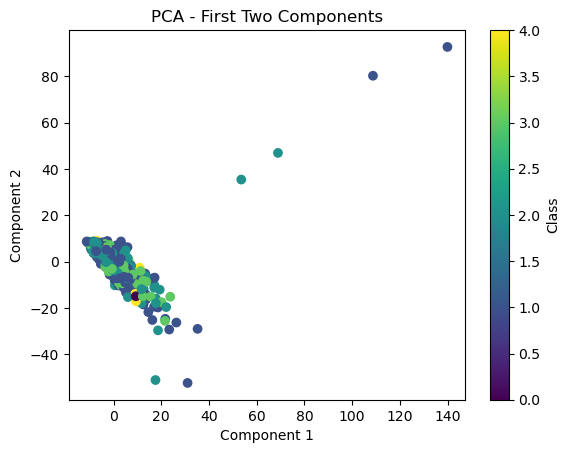

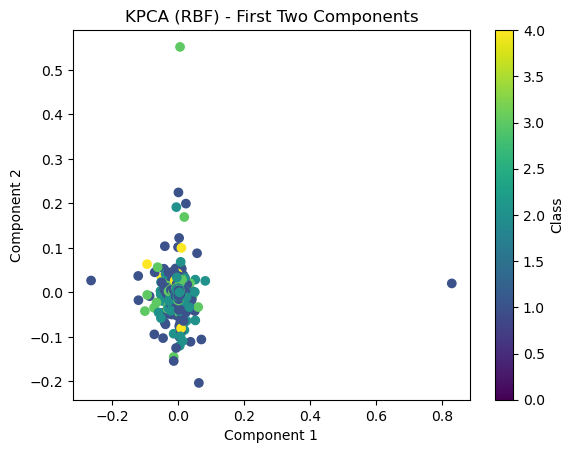

In [75]:
#1. Scatter Plots of Reduced Data:

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA - First Two Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.show()

# Scatter plot for KPCA with RBF kernel
plt.scatter(X_train_kpca_rbf[:, 0], X_train_kpca_rbf[:, 1], c=y_train, cmap='viridis')
plt.title('KPCA (RBF) - First Two Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.show()


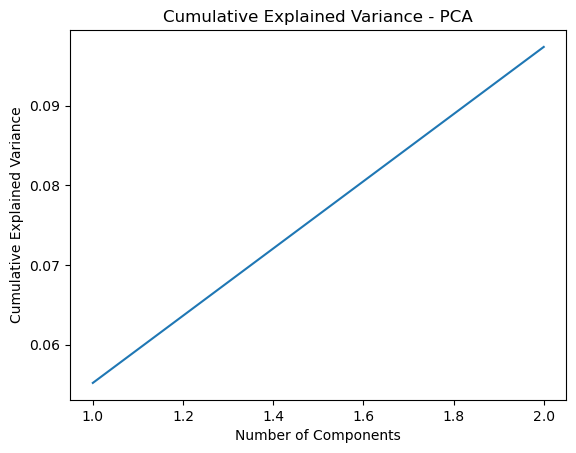

In [77]:
#2. Variance Explained Plot:

# Explained Variance Plot for PCA
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance - PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


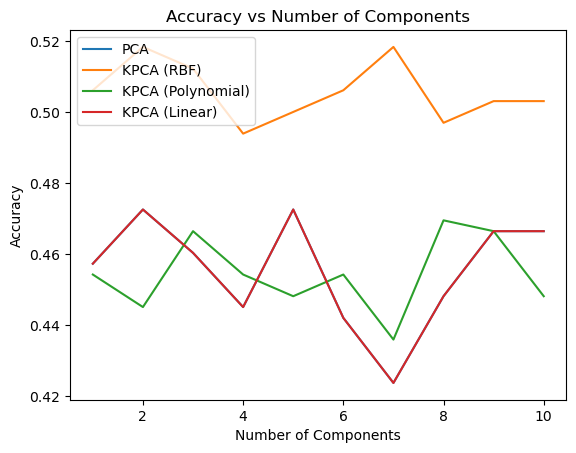

In [83]:
#3. Accuracy vs. Number of Components Plot:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  # Import the KNN classifier

# Initialize empty lists to store accuracies
accuracies_pca = []
accuracies_kpca_rbf = []
accuracies_kpca_poly = []
accuracies_kpca_linear = []

# Function to evaluate accuracy for different number of components
def evaluate_accuracy(X_train, X_test, y_train, y_test, method_name, n_components_list):
    for n_components in n_components_list:
        if method_name == 'PCA':
            pca = PCA(n_components=n_components)
            X_train_transformed = pca.fit_transform(X_train)
            X_test_transformed = pca.transform(X_test)
        elif method_name == 'KPCA (RBF)':
            kpca_rbf = KernelPCA(kernel='rbf', gamma=15, n_components=n_components)
            X_train_transformed = kpca_rbf.fit_transform(X_train)
            X_test_transformed = kpca_rbf.transform(X_test)
        elif method_name == 'KPCA (Polynomial)':
            kpca_poly = KernelPCA(kernel='poly', degree=3, coef0=1, n_components=n_components)
            X_train_transformed = kpca_poly.fit_transform(X_train)
            X_test_transformed = kpca_poly.transform(X_test)
        elif method_name == 'KPCA (Linear)':
            kpca_linear = KernelPCA(kernel='linear', n_components=n_components)
            X_train_transformed = kpca_linear.fit_transform(X_train)
            X_test_transformed = kpca_linear.transform(X_test)

        # Fit classifier and calculate accuracy
        clf = KNeighborsClassifier(n_neighbors=5)  # Use KNeighborsClassifier
        clf.fit(X_train_transformed, y_train)
        y_pred = clf.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, y_pred)

        # Store accuracy
        if method_name == 'PCA':
            accuracies_pca.append(accuracy)
        elif method_name == 'KPCA (RBF)':
            accuracies_kpca_rbf.append(accuracy)
        elif method_name == 'KPCA (Polynomial)':
            accuracies_kpca_poly.append(accuracy)
        elif method_name == 'KPCA (Linear)':
            accuracies_kpca_linear.append(accuracy)

# Number of components to test
n_components_list = range(1, 11)

# Evaluate accuracy for PCA and KPCA
evaluate_accuracy(X_train, X_test, y_train, y_test, 'PCA', n_components_list)
evaluate_accuracy(X_train, X_test, y_train, y_test, 'KPCA (RBF)', n_components_list)
evaluate_accuracy(X_train, X_test, y_train, y_test, 'KPCA (Polynomial)', n_components_list)
evaluate_accuracy(X_train, X_test, y_train, y_test, 'KPCA (Linear)', n_components_list)

# 3. Accuracy vs. Number of Components Plot
plt.plot(n_components_list, accuracies_pca, label='PCA')
plt.plot(n_components_list, accuracies_kpca_rbf, label='KPCA (RBF)')
plt.plot(n_components_list, accuracies_kpca_poly, label='KPCA (Polynomial)')
plt.plot(n_components_list, accuracies_kpca_linear, label='KPCA (Linear)')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
